In [1]:
import signal_processing, data_load, learn, evaluate

Using TensorFlow backend.


In [2]:
num_rows = 45
num_columns = 2900
num_channels = 1

num_epochs = 10
num_batch_size = 11
num_speakers = 10

In [3]:
featuresdf = data_load.make_dataframe(num_speakers, './Dataset/wav/', num_rows, num_columns)

Finished feature extraction from  970  files


In [4]:
result_sets = data_load.make_train_test_sets(featuresdf, num_rows, num_columns, num_channels)
num_labels = result_sets[4]
model = learn.build_CNN_model(num_rows, num_columns, num_labels)

In [5]:
learn.compile(model) 

In [6]:
result_sets[1].shape

(194, 45, 2900, 1)

In [7]:
evaluate.evaluate_before_training(model, result_sets[0], result_sets[2])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 44, 2899, 16)      80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 1449, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 1449, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 1448, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 724, 32)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 724, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 723, 64)        8

In [8]:
history = learn.train_model(model, result_sets, num_epochs, num_batch_size, 'CNN4', 'default', 'CNN4')

Train on 776 samples, validate on 194 samples
Epoch 1/10
770/776 [============================>.] - ETA: 0s - loss: 2.3085 - accuracy: 0.1545
Epoch 00001: val_loss improved from inf to 2.18270, saving model to saved_models/weights.best.CNN4.hdf5
776/776 [==============================] - 63s 81ms/sample - loss: 2.3061 - accuracy: 0.1572 - val_loss: 2.1827 - val_accuracy: 0.2680
Epoch 2/10
770/776 [============================>.] - ETA: 0s - loss: 1.9104 - accuracy: 0.3792
Epoch 00002: val_loss improved from 2.18270 to 1.64568, saving model to saved_models/weights.best.CNN4.hdf5
776/776 [==============================] - 63s 81ms/sample - loss: 1.9066 - accuracy: 0.3802 - val_loss: 1.6457 - val_accuracy: 0.4845
Epoch 3/10
770/776 [============================>.] - ETA: 0s - loss: 1.5408 - accuracy: 0.4688
Epoch 00003: val_loss improved from 1.64568 to 1.45823, saving model to saved_models/weights.best.CNN4.hdf5
776/776 [==============================] - 62s 80ms/sample - loss: 1.5347 - 

In [9]:
evaluate.evaluate_model(model, 'CNN4', result_sets)

Training Accuracy:  0.7654639
Testing Accuracy:  0.7113402


In [10]:
evaluate.display_metrics(model, 'CNN4', result_sets)

              precision    recall  f1-score   support

           0       0.65      0.81      0.72        16
           1       0.71      0.94      0.81        18
           2       0.97      0.84      0.90        43
           3       0.41      0.60      0.49        20
           4       1.00      0.15      0.27        13
           5       0.92      0.73      0.81        30
           6       0.92      0.79      0.85        14
           7       0.64      0.88      0.74        16
           8       1.00      0.08      0.15        12
           9       0.43      0.83      0.57        12

    accuracy                           0.71       194
   macro avg       0.76      0.67      0.63       194
weighted avg       0.79      0.71      0.70       194

Confusion matrix: 
[[13  0  1  0  0  0  0  2  0  0]
 [ 0 17  0  1  0  0  0  0  0  0]
 [ 0  5 36  1  0  0  0  0  0  1]
 [ 3  0  0 12  0  0  0  1  0  4]
 [ 1  1  0  5  2  0  0  0  0  4]
 [ 0  0  0  4  0 22  0  4  0  0]
 [ 0  0  0  1  0  2 11  

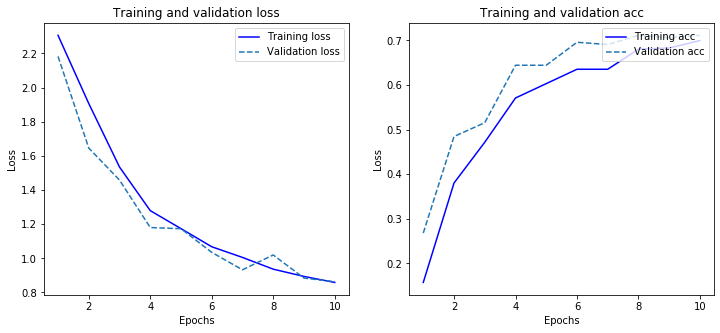

In [11]:
evaluate.plot_history(history)

In [12]:
modelReg = learn.build_regularized_CNN_model(num_rows, num_columns, num_labels)
learn.compile(modelReg)
reg_history= learn.train_model(modelReg, result_sets, num_epochs, num_batch_size, 'CNN4Reg', 'regularization', 'CNN4Reg')

Train on 776 samples, validate on 194 samples
Epoch 1/10
770/776 [============================>.] - ETA: 0s - loss: 3.3526 - accuracy: 0.1714
Epoch 00001: val_loss improved from inf to 3.03211, saving model to saved_models/weights.best.CNN4Reg.hdf5
776/776 [==============================] - 64s 83ms/sample - loss: 3.3486 - accuracy: 0.1740 - val_loss: 3.0321 - val_accuracy: 0.1649
Epoch 2/10
770/776 [============================>.] - ETA: 0s - loss: 2.7085 - accuracy: 0.3052
Epoch 00002: val_loss improved from 3.03211 to 2.43049, saving model to saved_models/weights.best.CNN4Reg.hdf5
776/776 [==============================] - 61s 78ms/sample - loss: 2.7059 - accuracy: 0.3041 - val_loss: 2.4305 - val_accuracy: 0.4124
Epoch 3/10
770/776 [============================>.] - ETA: 0s - loss: 2.2000 - accuracy: 0.4182
Epoch 00003: val_loss improved from 2.43049 to 2.21572, saving model to saved_models/weights.best.CNN4Reg.hdf5
776/776 [==============================] - 61s 79ms/sample - loss: 

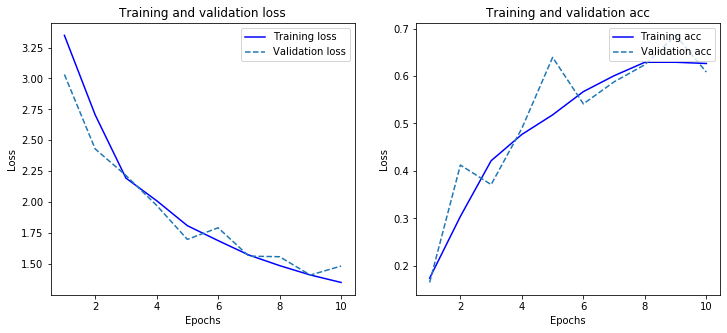

In [13]:
evaluate.plot_history(reg_history)

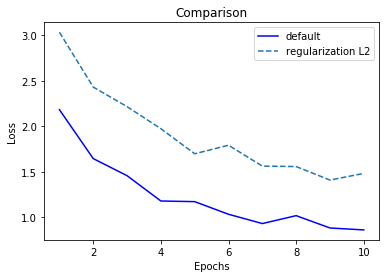

In [14]:
evaluate.plot_compared_val_loss(history, reg_history, 'default', 'regularization L2')